<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
data = pd.read_csv("/content/ann_used_cars.csv", usecols=["mileage", "price"])
data.head()

,mileage,price
0,7413,21992
1,10926,20995
2,7351,19995
3,11613,17809
4,8367,17500


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['mileage'], data['price'], test_size=0.3, random_state=42)

In [5]:
#Normalizing
import numpy as np
X_train = np.atleast_2d(X_train).T
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [6]:
#Convert Data sets to Tensors
import tensorflow as tf
X_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype = tf.float32)

## Gradient Descent

In [7]:
input_dim = X_train.shape[1]
output_dim = 1
learning_rate = 0.01

weight = tf.Variable(tf.random.normal([input_dim, output_dim]))
bias = tf.Variable(tf.random.normal([output_dim,]))
print(weight)
print(bias)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.3559344]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.73969686], dtype=float32)>


### **Step 2: Take a step in the direction with the steepest gradient**
### **Step 3: Calculate the new loss**
### **Step 4: Repeat steps 2 and 3**

In [8]:
for steps in range(100):
  with tf.GradientTape() as tape:
    #Predict
    predictions = tf.matmul(X_train, weight) + bias

    #Calculate Loss
    loss = tf.reduce_mean(tf.square(y_train  - predictions)) #mean square error
    dloss_dw, dloss_db = tape.gradient(loss, [weight, bias])

    weight.assign_sub(learning_rate* dloss_dw)
    bias.assign_sub(learning_rate *dloss_db)

    print('Step %d: Weight:1%d Bias:%d Loss = %.0f' %(steps+1, weight, bias, loss))

Step 1: Weight:169 Bias:258 Loss = 175127232
Step 2: Weight:1134 Bias:510 Loss = 168130176
Step 3: Weight:1198 Bias:756 Loss = 161429344
Step 4: Weight:1261 Bias:997 Loss = 155012224
Step 5: Weight:1322 Bias:1233 Loss = 148866768
Step 6: Weight:1382 Bias:1464 Loss = 142981456
Step 7: Weight:1441 Bias:1691 Loss = 137345328
Step 8: Weight:1498 Bias:1912 Loss = 131947808
Step 9: Weight:1554 Bias:2128 Loss = 126778792
Step 10: Weight:1609 Bias:2340 Loss = 121828600
Step 11: Weight:1662 Bias:2548 Loss = 117087992
Step 12: Weight:1715 Bias:2751 Loss = 112548064
Step 13: Weight:1766 Bias:2949 Loss = 108200336
Step 14: Weight:1816 Bias:3144 Loss = 104036664
Step 15: Weight:1865 Bias:3334 Loss = 100049272
Step 16: Weight:1913 Bias:3520 Loss = 96230680
Step 17: Weight:1959 Bias:3703 Loss = 92573736
Step 18: Weight:11005 Bias:3881 Loss = 89071608
Step 19: Weight:11050 Bias:4055 Loss = 85717744
Step 20: Weight:11094 Bias:4226 Loss = 82505856
Step 21: Weight:11136 Bias:4393 Loss = 79429928
Step 22:

## Calculating the Gradient Example

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create DataFrame
data = {'height':[80,79,85,90,95,75,80,90,81,85],
        'weight':[183.5,180,185,190,194.5,177.5,181.5,189,184,188]}
data = pd.DataFrame(data)

x=data["height"]
y=data["weight"]
data

,height,weight
0,80,183.5
1,79,180.0
2,85,185.0
3,90,190.0
4,95,194.5
5,75,177.5
6,80,181.5
7,90,189.0
8,81,184.0
9,85,188.0


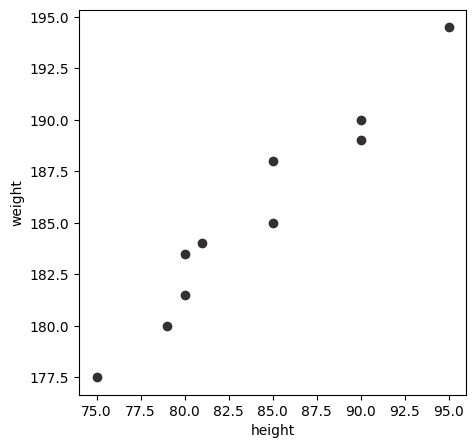

In [10]:
plt.figure(figsize=(5, 5))
plt.scatter(data['height'],data['weight'], c = '#323031')
plt.xlabel('height')
plt.ylabel('weight');

In [11]:
learning_rate=0.00001 #learning rate
weight=0
for i in range(len(x)):

    y_pred = weight * x[i]
    loss = (y_pred - y[i]) **2
                       # error
    grad_weight= 2 * (y_pred - y[i]) * x[i]  # derevative

    weight = weight - grad_weight * learning_rate # in sgd update takes place after every point
    print('Step %d: Weight:%f Loss = %f' % (i+1, weight, loss))


Step 1: Weight:0.293600 Loss = 33672.250000
Step 2: Weight:0.541353 Loss = 24587.996191
Step 3: Weight:0.777627 Loss = 19316.832427
Step 4: Weight:0.993652 Loss = 14403.249176
Step 5: Weight:1.183848 Loss = 10020.627777
Step 6: Weight:1.316915 Loss = 7869.717921
Step 7: Weight:1.438750 Loss = 5798.338345
Step 8: Weight:1.545872 Loss = 3541.741391
Step 9: Weight:1.641103 Loss = 3455.599942
Step 10: Weight:1.723563 Loss = 2352.856986


In [12]:
print("optimal weight value is",weight) #optimal value of w

optimal weight value is 1.7235634939076874


## Gradient Descent Optimization

In [13]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("/content/usedcars.csv")
data.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [16]:
#One-hot encode
data = pd.get_dummies(data)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'price'], data['price'], test_size=0.2, random_state=1)

### Training

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras import layers

model1 = tf.keras.Sequential()
model1.add(InputLayer(input_shape=X_train.shape[1]))
model1.add(layers.BatchNormalization())
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation='relu'))

**Using Defaults**

In [19]:
model1.compile(loss="mean_squared_error")

In [20]:
model1.fit(X_train, y_train)

4/4 [==============================] - 4s 5ms/step - loss: 176750864.0000


In [21]:
y_pred = model1.predict(X_test)

1/1 [==============================] - 0s 123ms/step


In [22]:
# Accuracy (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

13321.03403840985

**Using Optimizers**

In [23]:
from tensorflow.keras.optimizers import Adam

model2 = tf.keras.Sequential()
model2.add(InputLayer(input_shape=X_train.shape[1]))
model2.add(layers.BatchNormalization())
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1, activation='relu'))

In [24]:
model2.compile(optimizer = Adam(learning_rate=0.001), loss="mean_squared_error")

In [25]:
history2 = model2.fit(X_train, y_train, epochs = 15, batch_size=16)

Epoch 1/15
8/8 [==============================] - 2s 4ms/step - loss: 176754352.0000
Epoch 2/15
8/8 [==============================] - 0s 3ms/step - loss: 176740240.0000
Epoch 3/15
8/8 [==============================] - 0s 3ms/step - loss: 176719728.0000
Epoch 4/15
8/8 [==============================] - 0s 3ms/step - loss: 176694416.0000
Epoch 5/15
8/8 [==============================] - 0s 3ms/step - loss: 176661936.0000
Epoch 6/15
8/8 [==============================] - 0s 5ms/step - loss: 176625744.0000
Epoch 7/15
8/8 [==============================] - 0s 4ms/step - loss: 176575888.0000
Epoch 8/15
8/8 [==============================] - 0s 4ms/step - loss: 176514464.0000
Epoch 9/15
8/8 [==============================] - 0s 4ms/step - loss: 176426176.0000
Epoch 10/15
8/8 [==============================] - 0s 3ms/step - loss: 176318304.0000
Epoch 11/15
8/8 [==============================] - 0s 3ms/step - loss: 176179600.0000
Epoch 12/15
8/8 [==============================] - 0s 4ms/step 

In [26]:
y_pred = model2.predict(X_test)

# Accuracy (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1/1 [==============================] - 0s 63ms/step


7836.355841253655